<a href="https://colab.research.google.com/github/robin-ochieng/Clustering-Models----Machine-Learning/blob/main/Emerging_Markets_Sales_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [ ]:
#import/load the data
new_business_sales_data = pd.read_excel('/content/New Business 2022 - 2023.xlsx',  index_col='Date', parse_dates = True)

In [ ]:
#import/load the data
renewal_business_sales_data = pd.read_excel('/content/Renewals Data 2022 - 2023.xlsx',  index_col='Date', parse_dates = True)

In [ ]:
new_business_sales_data_2022 = new_business_sales_data[new_business_sales_data.index.year==2022]
len(new_business_sales_data_2022)

1010

In [ ]:
new_business_sales_data_2023 = new_business_sales_data[new_business_sales_data.index.year==2023]
len(new_business_sales_data_2023)

1460

In [ ]:
renewal_business_sales_data_2022 = renewal_business_sales_data[renewal_business_sales_data.index.year==2022]
len(renewal_business_sales_data_2022)

609

In [ ]:
renewal_business_sales_data_2023 = renewal_business_sales_data[renewal_business_sales_data.index.year==2023]
len(renewal_business_sales_data_2023)

572

In [ ]:
new_business_sales_data_2023.columns

Index(['Sales'], dtype='object')

<ipython-input-10-5a045c617fb0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_business_sales_data_2023['Quarter'] = quarters


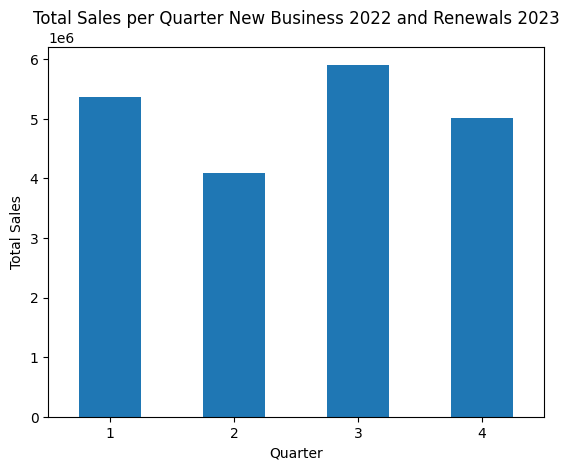

In [ ]:
# Extract the quarter information from the index
new_business_sales_data_2023.index = pd.to_datetime(new_business_sales_data_2023.index)
quarters = new_business_sales_data_2023.index.quarter

# Add the quarter information as a new column
new_business_sales_data_2023['Quarter'] = quarters

# Aggregate the sales data by quarter and sum it up
sales_per_quarter = new_business_sales_data_2023.groupby('Quarter')['Sales'].sum()

# Plot the aggregated data using a bar plot
sales_per_quarter.plot(kind='bar', xlabel='Quarter', ylabel='Total Sales', title='Total Sales per Quarter New Business 2022 and Renewals 2023')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

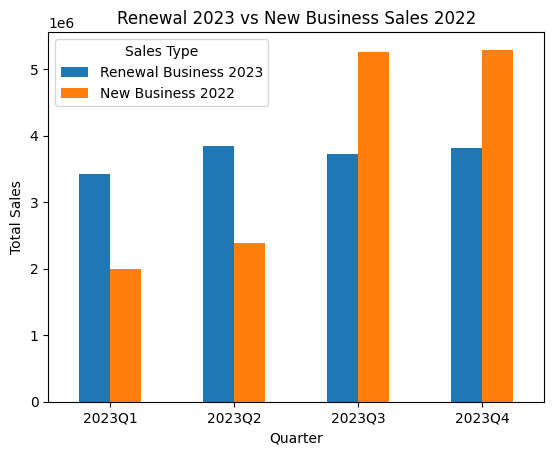

In [ ]:

# Extract the quarter information from the index for renewal_business_sales_data_2023
renewal_quarters_2023 = renewal_business_sales_data_2023.index.to_period('Q')

# Aggregate the sales data by quarter for renewal business
renewal_sales_per_quarter_2023 = renewal_business_sales_data_2023.groupby(renewal_quarters_2023)['Sales'].sum()

# Extract the quarter information from the index for new_business_sales_data_2022
new_quarters_2022 = new_business_sales_data_2022.index.to_period('Q')

# Shift the index of new_quarters_2022 by 1 year to align with 2023 quarters
new_quarters_2023 = new_quarters_2022.shift(4)

# Aggregate the sales data by quarter for new business
new_sales_per_quarter_2022 = new_business_sales_data_2022.groupby(new_quarters_2023)['Sales'].sum()

# Combine the aggregated data into a single DataFrame, grouping 2022 quarters with 2023 quarters
combined_sales_data = pd.DataFrame({'Renewal Business 2023': renewal_sales_per_quarter_2023, 'New Business 2022': new_sales_per_quarter_2022})

# Plot the grouped bar chart
ax = combined_sales_data.plot(kind='bar', xlabel='Quarter', ylabel='Total Sales', title='Renewal 2023 vs New Business Sales 2022')

plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Sales Type')
plt.show()

In [ ]:
#Renewals count of sales 2023
Data_new_2023 = new_business_sales_data[new_business_sales_data.index.year==2023]
Count_of_sales_new_2023 = len(Data_new_2023)

#Renewals count of sales 2022
Data_new_2022= new_business_sales_data[new_business_sales_data.index.year==2022]
Count_of_sales_new_2022 = len(Data_new_2022)

#Renewals count of days 2023
new_business_counts_2023 = Data_new_2023.resample('D').sum()
new_business_counts_2023 =  new_business_counts_2023[new_business_counts_2023 != 0]
new_business_counts_2023 = len(new_business_counts_2023.dropna(subset=['Sales']))

#Renewals count of days 2022
new_business_counts_2022 = Data_new_2022.resample('D').sum()
new_business_counts_2022 =  new_business_counts_2022[new_business_counts_2022 != 0]
new_business_counts_2022 = len(new_business_counts_2022.dropna(subset=['Sales']))

Count_of_Sales_by_no_of_days_new_business_2023 = Count_of_sales_new_2023/new_business_counts_2023
Count_of_Sales_by_no_of_days_new_business_2022 = Count_of_sales_new_2022/new_business_counts_2022

print(Count_of_Sales_by_no_of_days_new_business_2023)
print(Count_of_Sales_by_no_of_days_new_business_2022)


4.281524926686217
3.4470989761092152


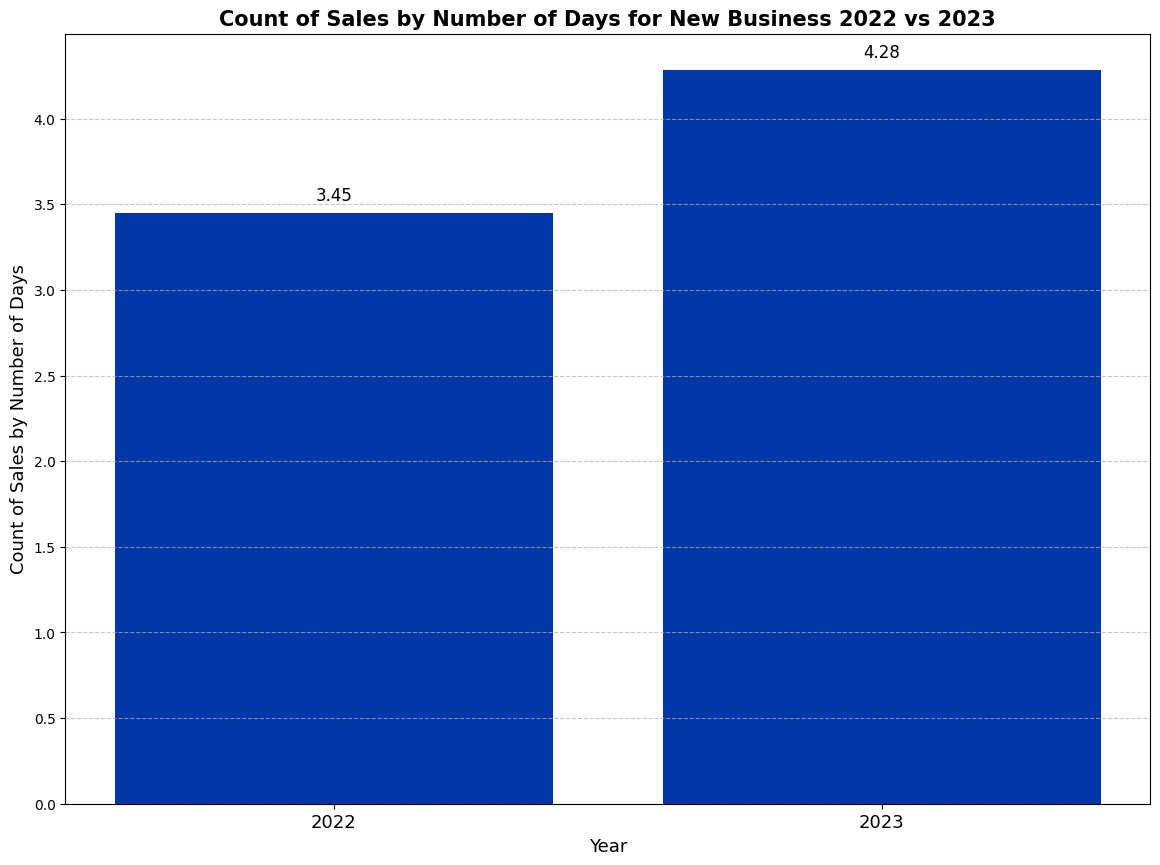

In [ ]:
# Data
years = [2023, 2022]
counts = [Count_of_Sales_by_no_of_days_new_business_2023, Count_of_Sales_by_no_of_days_new_business_2022]
# Plot
plt.figure(figsize=(14, 10))
bars = plt.bar(years, counts, color='#0137A6')
plt.title('Count of Sales by Number of Days for New Business 2022 vs 2023', fontsize=15, fontweight='bold')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Count of Sales by Number of Days', fontsize=13)
plt.xticks(years,fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adding values on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, '{:.2f}'.format(count), ha='center', va='bottom', fontsize=12) # Increase the font size to 12 points
plt.show()

In [ ]:
#Renewals count of sales 2023
Data_renewals_2023 = renewal_business_sales_data[renewal_business_sales_data.index.year==2023]
Count_of_sales_renewals_2023 = len(Data_renewals_2023)

#Renewals count of sales 2022
Data_renewals_2022= renewal_business_sales_data[renewal_business_sales_data.index.year==2022]
Count_of_sales_renewals_2022 = len(Data_renewals_2022)

#Renewals count of days 2023
Renewals_business_counts_2023 = Data_renewals_2023.resample('D').sum()
Renewals_business_counts_2023 =  Renewals_business_counts_2023[Renewals_business_counts_2023 != 0]
Renewals_business_counts_2023 = len(Renewals_business_counts_2023.dropna(subset=['Sales']))

#Renewals count of days 2022
Renewals_business_counts_2022 = Data_renewals_2022.resample('D').sum()
Renewals_business_counts_2022 =  Renewals_business_counts_2022[Renewals_business_counts_2022 != 0]
Renewals_business_counts_2022 = len(Renewals_business_counts_2022.dropna(subset=['Sales']))

Count_of_Sales_by_no_of_days_renewal_business_2023 = Count_of_sales_renewals_2023/Renewals_business_counts_2023
Count_of_Sales_by_no_of_days_renewal_business_2022 = Count_of_sales_renewals_2022/Renewals_business_counts_2022

print(Count_of_Sales_by_no_of_days_renewal_business_2023)
print(Count_of_Sales_by_no_of_days_renewal_business_2022)

2.064981949458484
2.1985559566787005


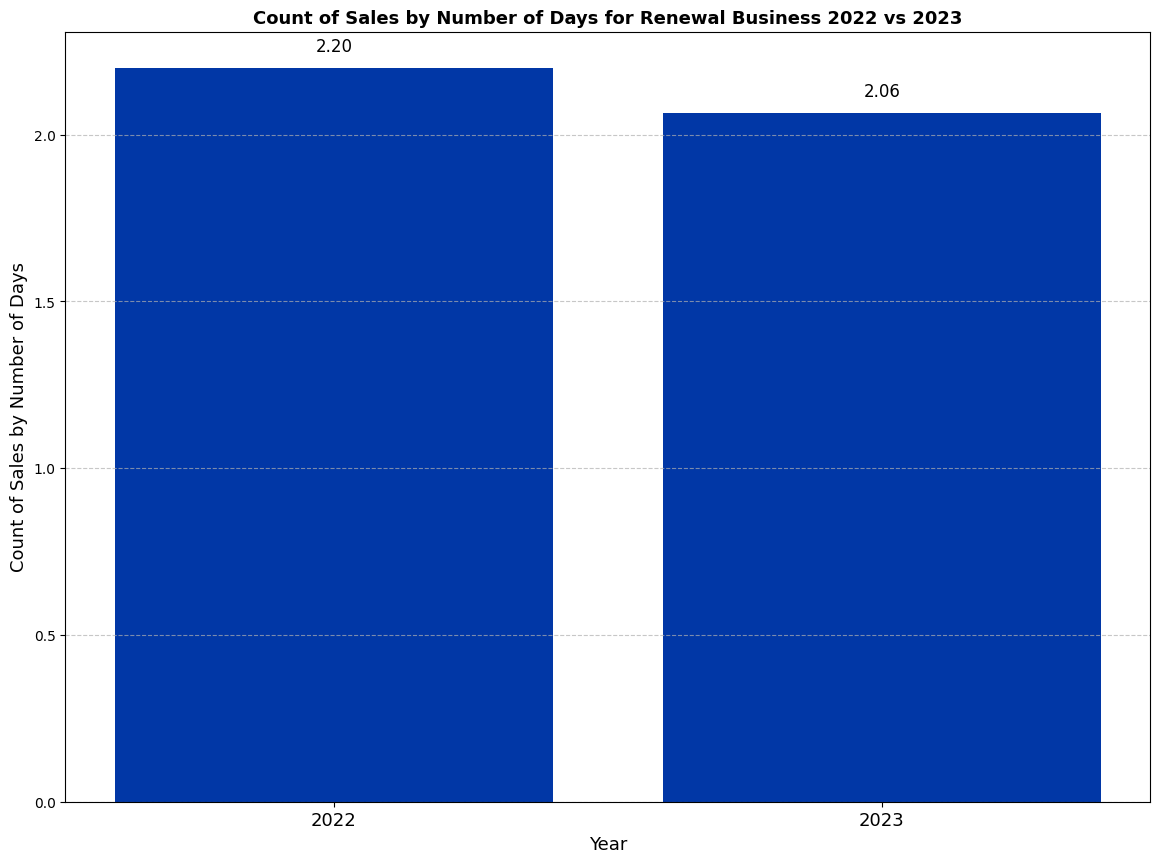

In [ ]:
# Data
years = [2023, 2022]
counts = [Count_of_Sales_by_no_of_days_renewal_business_2023, Count_of_Sales_by_no_of_days_renewal_business_2022]
# Plot
plt.figure(figsize=(14, 10))
bars = plt.bar(years, counts, color='#0137A6')
plt.title('Count of Sales by Number of Days for Renewal Business 2022 vs 2023', fontweight='bold', fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Count of Sales by Number of Days', fontsize=13)
plt.xticks(years, fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adding values on top of the bars
for bar, count in zip(bars, counts):
     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, '{:.2f}'.format(count), ha='center', fontsize=12) # Increase the font size to 12 points
plt.show()

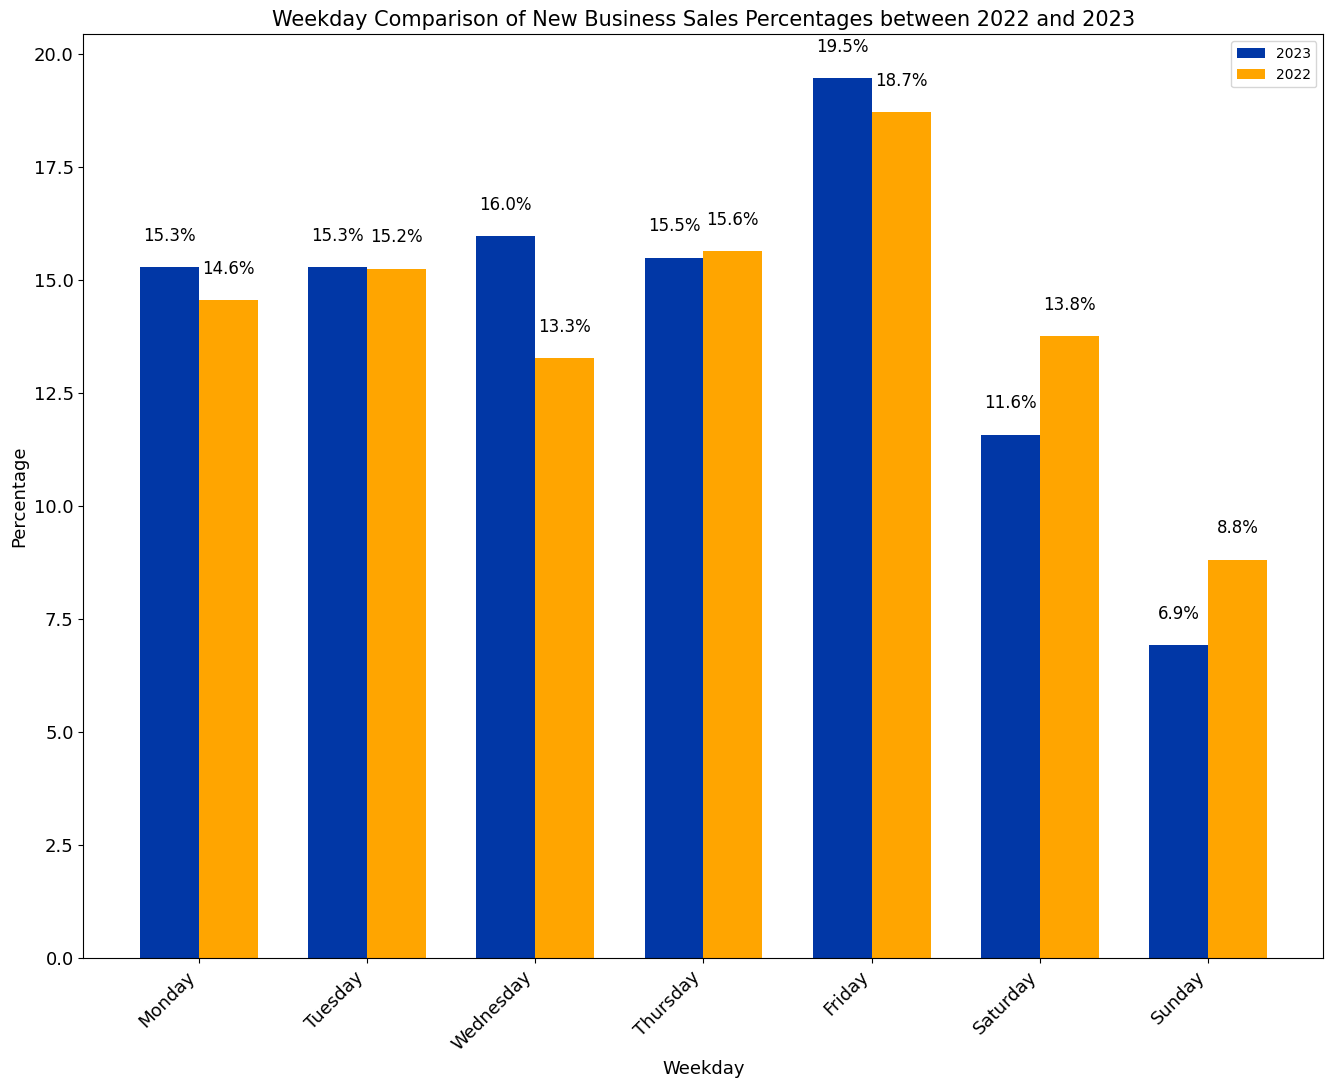

Weekday percentages for 2023:
Date
Monday       15.284441
Tuesday      15.284441
Wednesday    15.969842
Thursday     15.490062
Friday       19.465387
Saturday     11.583276
Sunday        6.922550
Name: Sales, dtype: float64
Weekday percentages for 2022:
Date
Monday       14.554455
Tuesday      15.247525
Wednesday    13.267327
Thursday     15.643564
Friday       18.712871
Saturday     13.762376
Sunday        8.811881
Name: Sales, dtype: float64


In [ ]:
# Filter data for weekdays in the year 2023
new_business_sales_data_2023 = new_business_sales_data[new_business_sales_data.index.year == 2023]
new_business_sales_data_2022 = new_business_sales_data[new_business_sales_data.index.year == 2022]

# Resample data by weekday and count sales
weekday_counts_2023 = new_business_sales_data_2023.resample('D').count()
weekday_counts_2022 = new_business_sales_data_2022.resample('D').count()

# Group by weekday and sum sales
weekday_counts_2023 = weekday_counts_2023.groupby(weekday_counts_2023.index.day_name()).sum()['Sales']
weekday_counts_2022 = weekday_counts_2022.groupby(weekday_counts_2022.index.day_name()).sum()['Sales']

# Calculate percentages
weekday_percentages_2023 = (weekday_counts_2023 / weekday_counts_2023.sum()) * 100
weekday_percentages_2022 = (weekday_counts_2022 / weekday_counts_2022.sum()) * 100

# Reorder the weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_percentages_2023 = weekday_percentages_2023.reindex(weekday_order)
weekday_percentages_2022 = weekday_percentages_2022.reindex(weekday_order)

# Plotting
plt.figure(figsize=(16, 12))

# Define the x locations for the groups
ind = np.arange(len(weekday_percentages_2023))

# Width of each bar
width = 0.35

# Plot bars for 2023
bars_2023 = plt.bar(ind - width/2, weekday_percentages_2023, width, color='#0137A6', label='2023')

# Plot bars for 2022
bars_2022 = plt.bar(ind + width/2, weekday_percentages_2022, width, color='#FFA500', label='2022')

plt.title('Weekday Comparison of New Business Sales Percentages between 2022 and 2023', fontsize=15)
plt.xlabel('Weekday', fontsize=13)
plt.ylabel('Percentage', fontsize=13)
plt.xticks(ind, weekday_order, rotation=45, ha='right', fontsize=13)
plt.yticks(fontsize=13)

# Adding values on top of bars for 2023
for bar in bars_2023:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{bar.get_height():.1f}%", ha='center', va='bottom', fontsize=12)

# Adding values on top of bars for 2022
for bar in bars_2022:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{bar.get_height():.1f}%", ha='center', va='bottom', fontsize=12)

plt.legend()
plt.show()

print("Weekday percentages for 2023:")
print(weekday_percentages_2023)

print("Weekday percentages for 2022:")
print(weekday_percentages_2022)


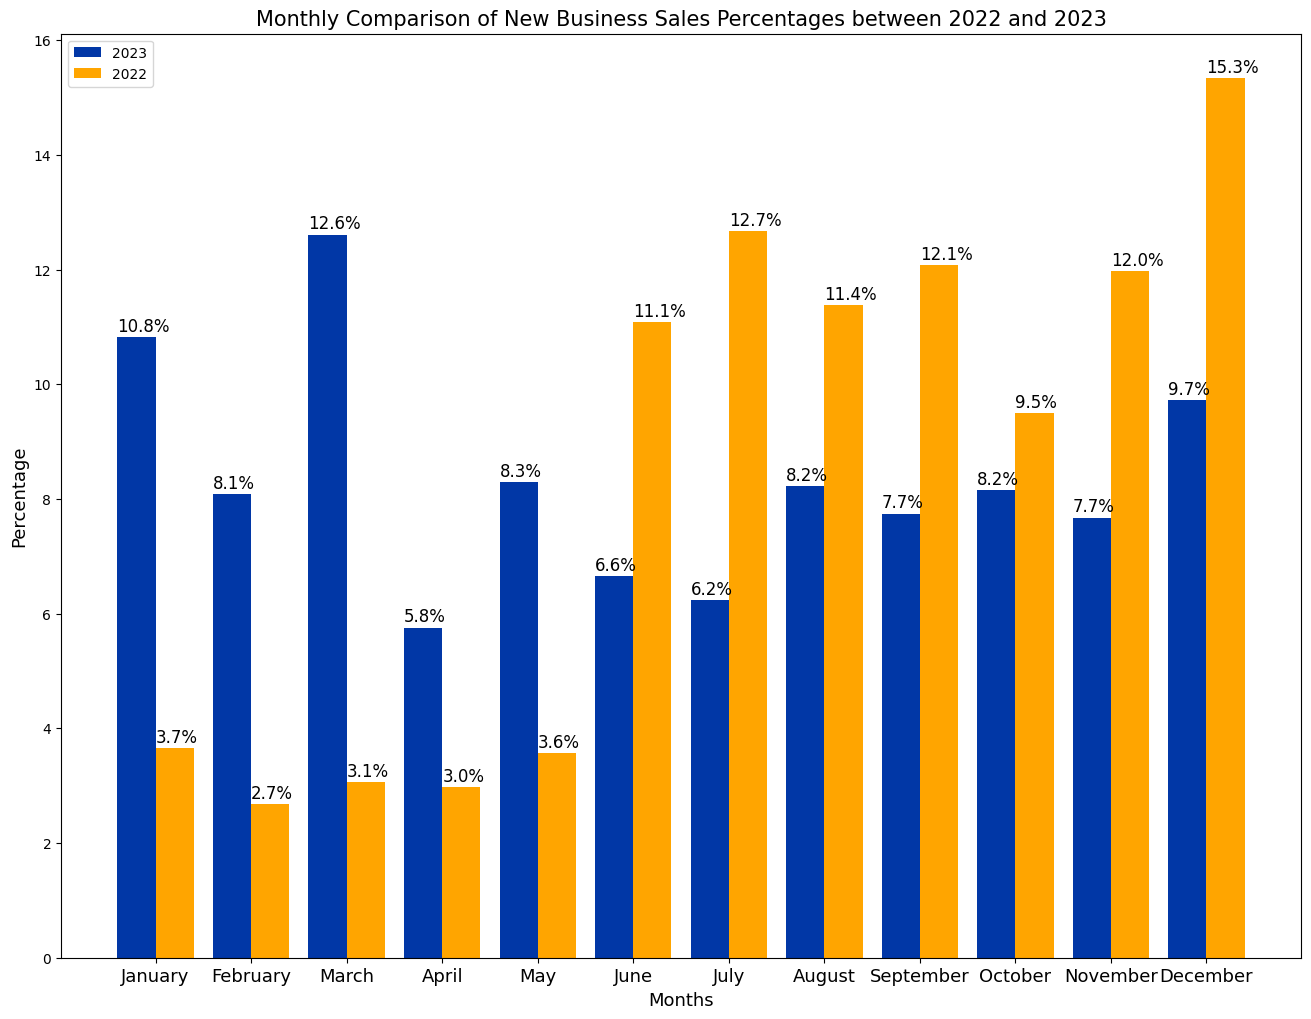

Monthly percentages for 2023:
Date
2023-01-31    10.829335
2023-02-28     8.087731
2023-03-31    12.611378
2023-04-30     5.757368
2023-05-31     8.293352
2023-06-30     6.648389
2023-07-31     6.237149
2023-08-31     8.224812
2023-09-30     7.745031
2023-10-31     8.156271
2023-11-30     7.676491
2023-12-31     9.732694
Freq: M, Name: Sales, dtype: float64
Monthly percentages for 2022:
Date
2022-01-31     3.663366
2022-02-28     2.673267
2022-03-31     3.069307
2022-04-30     2.970297
2022-05-31     3.564356
2022-06-30    11.089109
2022-07-31    12.673267
2022-08-31    11.386139
2022-09-30    12.079208
2022-10-31     9.504950
2022-11-30    11.980198
2022-12-31    15.346535
Freq: M, Name: Sales, dtype: float64


In [ ]:
# Filter data for the year 2023
new_business_sales_data_2023 = new_business_sales_data[new_business_sales_data.index.year == 2023]
new_business_sales_data_2022 = new_business_sales_data[new_business_sales_data.index.year == 2022]

# Resample data by month and count sales
monthly_counts_2023 = new_business_sales_data_2023.resample('M').count()['Sales']
monthly_counts_2022 = new_business_sales_data_2022.resample('M').count()['Sales']

# Calculate percentages
monthly_percentages_2023 = (monthly_counts_2023 / monthly_counts_2023.sum()) * 100
monthly_percentages_2022 = (monthly_counts_2022 / monthly_counts_2022.sum()) * 100

# Plotting
plt.figure(figsize=(16, 12))

# Plot bars for 2023
bars_2023 = plt.bar(monthly_percentages_2023.index.month - 0.2, monthly_percentages_2023, width=0.4, color='#0137A6', label='2023')

# Plot bars for 2022
bars_2022 = plt.bar(monthly_percentages_2022.index.month + 0.2, monthly_percentages_2022, width=0.4, color='#FFA500', label='2022')

plt.title('Monthly Comparison of New Business Sales Percentages between 2022 and 2023', fontsize=15)
plt.xlabel('Months', fontsize=13)
plt.ylabel('Percentage', fontsize=13)
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], fontsize=13)

# Adding values on top of bars for 2023
for i, v in enumerate(monthly_percentages_2023):
    plt.text(i + 0.6, v + 0.1, f"{v:.1f}%", color='black', fontsize=12)

# Adding values on top of bars for 2022
for i, v in enumerate(monthly_percentages_2022):
    plt.text(i + 1, v + 0.1, f"{v:.1f}%", color='black', fontsize=12)

plt.legend()
plt.show()

print("Monthly percentages for 2023:")
print(monthly_percentages_2023)

print("Monthly percentages for 2022:")
print(monthly_percentages_2022)


In [ ]:
# Filter data for the year 2023
renewal_business_sales_data_2023 = renewal_business_sales_data[renewal_business_sales_data.index.year == 2023]

# Resample data by month and count sales
monthly_counts = renewal_business_sales_data_2023.resample('M').count()['Sales']

# Calculate percentages
monthly_percentages = (monthly_counts / monthly_counts.sum()) * 100

# Plotting
plt.figure(figsize=(16, 12))
bars = plt.bar(monthly_percentages.index.month, monthly_percentages, color='#0137A6')
plt.title('Monthly New Business Sales Percentages in 2023', fontsize=15)
plt.xlabel('Months', fontsize=13)
plt.ylabel('Percentage', fontsize=13)
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], fontsize=13)

# Adding values on top of bars
for i, v in enumerate(monthly_percentages):
    plt.text(i + 0.8, v + 1, f"{v:.2f}%", color='black', fontsize=12)

plt.show()

print("Monthly percentages:")
print(monthly_percentages)


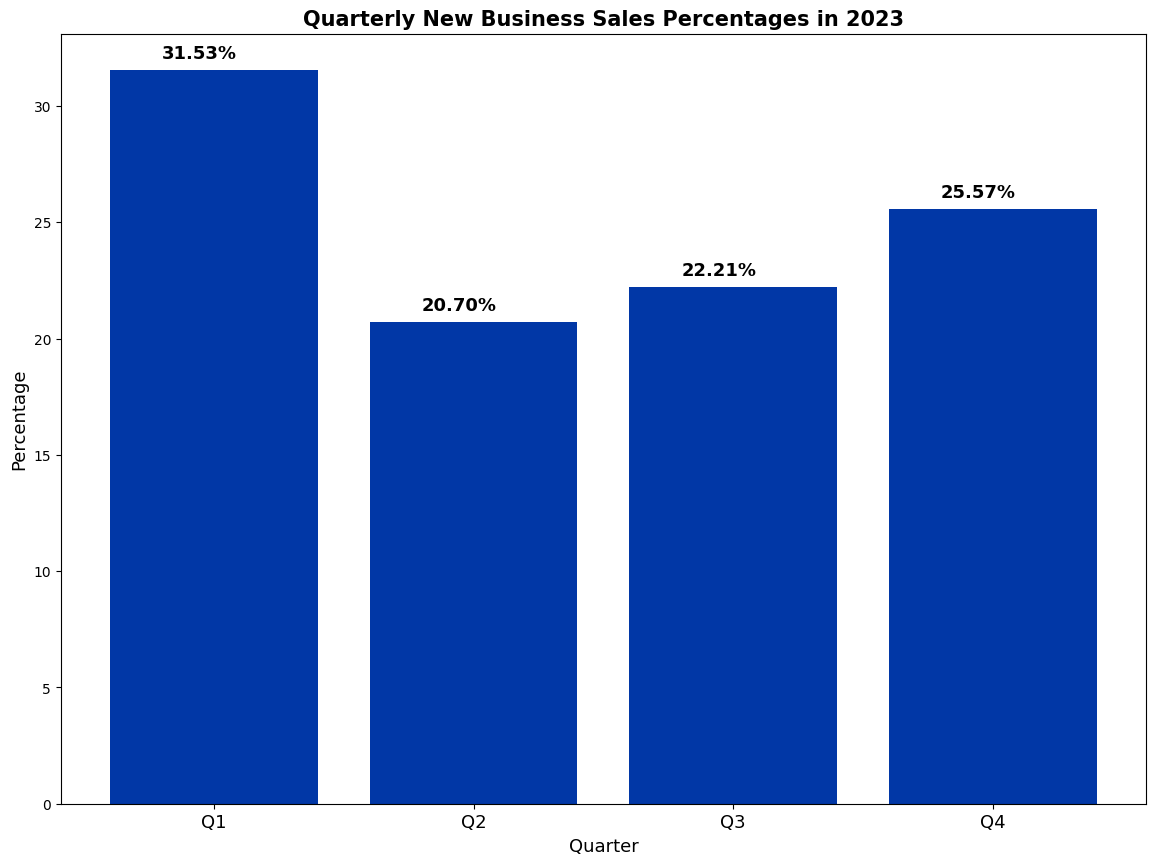

Quarterly percentages:
Date
2023-03-31    31.528444
2023-06-30    20.699109
2023-09-30    22.206991
2023-12-31    25.565456
Freq: Q-DEC, Name: Sales, dtype: float64


In [ ]:
new_business_sales_data_2023 = new_business_sales_data[new_business_sales_data.index.year==2023]
len(new_business_sales_data_2023)

quarterly_counts = new_business_sales_data_2023.resample('Q').count()['Sales']

# Calculate percentages
quarterly_percentages = (quarterly_counts / quarterly_counts.sum()) * 100

# Plotting
plt.figure(figsize=(14, 10))
bars = plt.bar(quarterly_percentages.index.quarter, quarterly_percentages, color='#0137A6')
plt.title('Quarterly New Business Sales Percentages in 2023', fontsize=15, fontweight='bold')
plt.xlabel('Quarter', fontsize=13)
plt.ylabel('Percentage', fontsize=13)
plt.xticks(range(1, 5), ['Q1', 'Q2', 'Q3', 'Q4'], fontsize=13)

# Adding values on top of bars
for i, v in enumerate(quarterly_percentages):
    plt.text(i + 0.8, v + 0.5, f"{v:.2f}%", color='black', fontweight='bold', fontsize=13)

plt.show()

print("Quarterly percentages:")
print(quarterly_percentages)


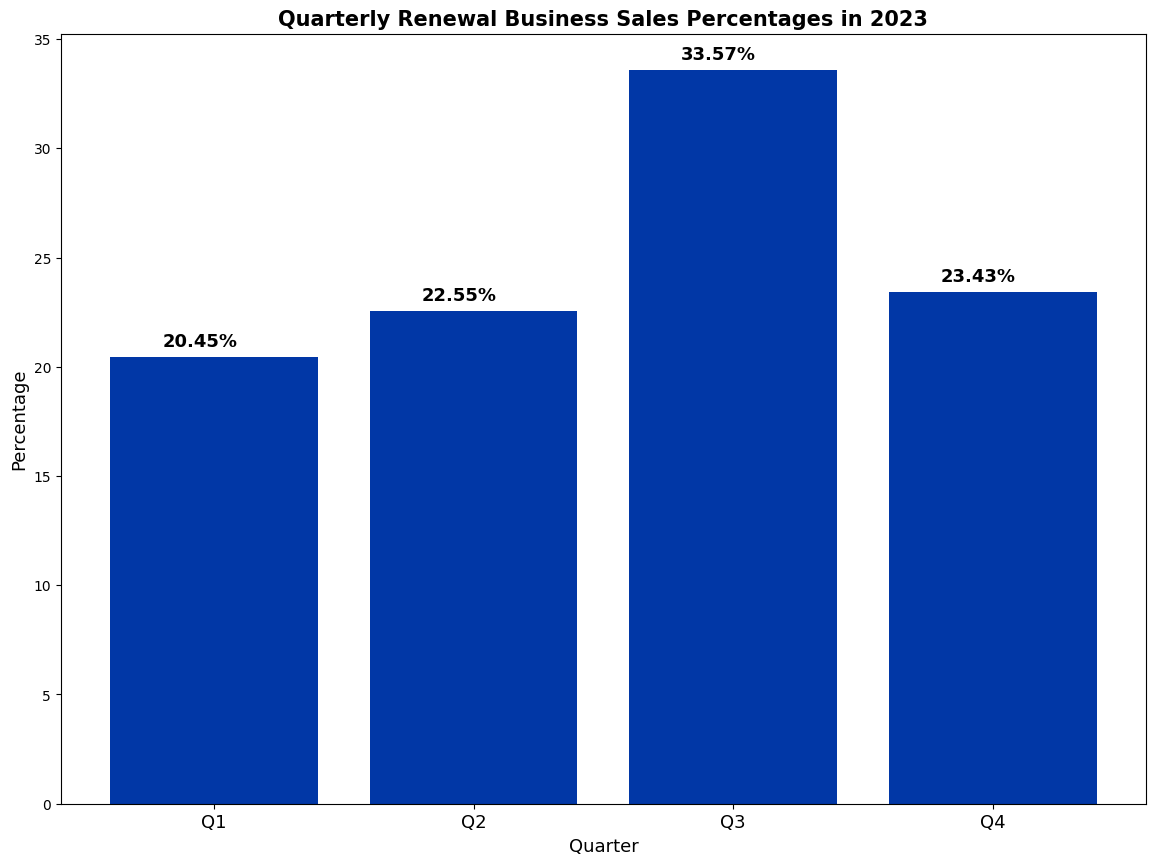

Quarterly percentages:
Date
2023-03-31    20.454545
2023-06-30    22.552448
2023-09-30    33.566434
2023-12-31    23.426573
Freq: Q-DEC, Name: Sales, dtype: float64


In [ ]:
renewal_business_sales_data_2023 = renewal_business_sales_data[renewal_business_sales_data.index.year==2023]
len(renewal_business_sales_data_2022)

quarterly_counts = renewal_business_sales_data_2023.resample('Q').count()['Sales']

# Calculate percentages
quarterly_percentages = (quarterly_counts / quarterly_counts.sum()) * 100

# Plotting
plt.figure(figsize=(14, 10))
bars = plt.bar(quarterly_percentages.index.quarter, quarterly_percentages, color='#0137A6')
plt.title('Quarterly Renewal Business Sales Percentages in 2023', fontsize=15, fontweight='bold')
plt.xlabel('Quarter', fontsize=13)
plt.ylabel('Percentage', fontsize=13)
plt.xticks(range(1, 5), ['Q1', 'Q2', 'Q3', 'Q4'], fontsize=13)

# Adding values on top of bars
for i, v in enumerate(quarterly_percentages):
    plt.text(i + 0.8, v + 0.5, f"{v:.2f}%", color='black', fontweight='bold', fontsize=13)

plt.show()

print("Quarterly percentages:")
print(quarterly_percentages)